<a href="https://colab.research.google.com/github/Ronimol23/Ronimol23/blob/main/remote_work_satisfaction_analysis_using_matching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install CausalInference

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import seaborn as sns
from causalinference import CausalModel

In [ ]:
%cd /content/drive/MyDrive/Econometrics and Causal Inference/Matching

/content/drive/MyDrive/Econometrics and Causal Inference/Matching


In [ ]:
df = pd.read_csv('stackoverflow.csv')
df.head()
df.value_counts()

Country         Salary         YearsCodedJob  OpenSource  Hobby  CompanySizeNumber  Remote      CareerSatisfaction  Data_scientist  Database_administrator  Desktop_applications_developer  Developer_with_stats_math_background  DevOps  Embedded_developer  Graphic_designer  Graphics_programming  Machine_learning_specialist  Mobile_developer  Quality_assurance_engineer  Systems_administrator  Web_developer
United States   45600.000000   1              1           1      10                 Not remote  4                   0               0                       0                               0                                     0       0                   0                 0                     0                            0                 0                           0                      1                2
United Kingdom  43750.000000   2              0           1      100                Not remote  8                   0               0                       0                          

In [ ]:
#dropping occupations to avoid trhe curse of dimensionality
df = df.drop(columns= ['Data_scientist', 'Database_administrator', 
                       'Database_administrator', 'Desktop_applications_developer', 
                       'Developer_with_stats_math_background', 'DevOps', 'Embedded_developer',
                       'Graphic_designer', 'Graphics_programming', 'Machine_learning_specialist',
                       'Mobile_developer', 'Quality_assurance_engineer', 'Systems_administrator',
                       'Web_developer'])

# alternate option
df = df.iloc[:,:8]

In [ ]:
df.head()

,Country,Salary,YearsCodedJob,OpenSource,Hobby,CompanySizeNumber,Remote,CareerSatisfaction
0,United Kingdom,100000.000000,20,0,1,5000,Remote,8
1,United States,130000.000000,20,1,1,1000,Remote,9
2,United States,175000.000000,16,0,1,10000,Not remote,7
3,Germany,64516.129030,4,0,0,1000,Not remote,9
4,India,6636.323594,1,0,1,5000,Not remote,5


In [ ]:
df.groupby(df.Remote_work).mean()

,Salary,YearsCodedJob,OpenSource,Hobby,CompanySizeNumber,CareerSatisfaction,USA,UK,DE,IND,CAN
Remote_work,,,,,,,,,,,
0,70201.175042,7.142857,0.332736,0.760510,2187.325563,7.551106,0.480175,0.189878,0.142857,0.096035,0.091054
1,87400.737001,10.120000,0.443478,0.766957,1712.756522,7.855652,0.662609,0.121739,0.069565,0.097391,0.048696


In [ ]:
# T-test
group1 = df.where(df.Remote == 'Remote').dropna()['Salary']
group2 = df.where(df.Remote == 'Not remote').dropna()['Salary']

In [ ]:
stat, p = ss.ttest_ind(group1, group2)
print(p)
print(stat)

1.0577078000364166e-22
9.84905884167872


In [ ]:
 # Where to store the loop
stat ={}
p = {}
# What to loop
continuous = ['Salary', 'YearsCodedJob']
# The loop
for x in continuous:
  group1 = df.where(df.Remote_work == 0).dropna()[x]
  group2 = df.where(df.Remote_work == 1).dropna()[x]
  stat[x], p[x] = ss.ttest_ind(group1, group2)

ttest_result = pd.DataFrame.from_dict(p, orient= 'Index')
ttest_result.columns = ['p-values']
print(ttest_result)

# if 'p-values' in ttest_result < 0.05:
#   print("The values are statitistically significant, and deserve further investigation")

if (ttest_result['p-values'] < 0.05).all():
  print("The values are statitistically significant, and deserve further investigation")

                   p-values
Salary         1.057708e-22
YearsCodedJob  3.637316e-30
The values are statitistically significant, and deserve further investigation


In [ ]:
#Chi-square test for categorical variables
tab = pd.crosstab(index=df.OpenSource,
                  columns= df.Remote)
tab

Remote,Not remote,Remote
OpenSource,,
0,3349,320
1,1670,255


In [ ]:
chi2, p, dof, expected = ss.chi2_contingency(tab)
p

1.5357696955569458e-07

In [ ]:
#What to loop
categorical = ['OpenSource', 'Hobby']

#The Loop
p = {}
chi2 = {}
dof = {}
expected = {}
for x in categorical:
  tab = pd.crosstab(index=df[x],
                  columns= df.Remote)
  chi2[x], p[x], dof[x], expected[x] = ss.chi2_contingency(tab)

results = pd.DataFrame.from_dict(p, orient ='index')
results.columns = ['p-values']
print(results)
if (results['p-values'] < 0.05).any():
  print("The values are statitistically significant, and deserve further investigation")

                p-values
OpenSource  1.535770e-07
Hobby       7.704515e-01
The values are statitistically significant, and deserve further investigation


In [ ]:
df.Country.value_counts()

United States     2791
United Kingdom    1023
Germany            757
India              538
Canada             485
Name: Country, dtype: int64

In [ ]:
df = df.assign(USA = (df['Country'].str.contains('United States')).astype(int))
df = df.assign(UK = (df['Country'].str.contains('United Kingdom')).astype(int))
df = df.assign(DE = (df['Country'].str.contains('Germany')).astype(int))
df = df.assign(IND = (df['Country'].str.contains('India')).astype(int))
df = df.assign(CAN = (df['Country'].str.contains('Canada')).astype(int))



In [ ]:
df.head(2)

,Country,Salary,YearsCodedJob,OpenSource,Hobby,CompanySizeNumber,Remote,CareerSatisfaction,USA,UK,DE,IND,CAN
0,United Kingdom,100000.0,20,0,1,5000,Remote,8,0,1,0,0,0
1,United States,130000.0,20,1,1,1000,Remote,9,1,0,0,0,0


In [ ]:
df = df.assign(Remote_work = (df['Remote'].str.contains('Remote')).astype(int))


In [ ]:
# Alternate option is:
df = pd.get_dummies(df, drop_first=True)

In [ ]:
df.head(2)

,Country,Salary,YearsCodedJob,OpenSource,Hobby,CompanySizeNumber,Remote,CareerSatisfaction,USA,UK,DE,IND,CAN,Remote_work
0,United Kingdom,100000.0,20,0,1,5000,Remote,8,0,1,0,0,0,1
1,United States,130000.0,20,1,1,1000,Remote,9,1,0,0,0,0,1


In [ ]:
df = df.drop(columns=['Country', 'Remote'])

In [ ]:
df.head(0)

,Salary,YearsCodedJob,OpenSource,Hobby,CompanySizeNumber,CareerSatisfaction,USA,UK,DE,IND,CAN,Remote_work


In [ ]:
treat = df.Remote_work.values
y = df.CareerSatisfaction.values
confounders = df.drop(columns = ['Remote_work', 'CareerSatisfaction', 'Hobby']).values
confounders

array([[1.00000000e+05, 2.00000000e+01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.30000000e+05, 2.00000000e+01, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.75000000e+05, 1.60000000e+01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [4.22845397e+03, 2.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [3.37500000e+04, 1.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.00000000e+04, 3.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [ ]:
import statsmodels.api as sm
confounders_csr = sm.add_constant(confounders)
csr_model = sm.Logit(treat, confounders_csr).fit()
print(csr_model.summary())

Optimization terminated successfully.
         Current function value: 0.309497
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 5594
Model:                          Logit   Df Residuals:                     5584
Method:                           MLE   Df Model:                            9
Date:                Tue, 07 Feb 2023   Pseudo R-squ.:                 0.06544
Time:                        10:45:36   Log-Likelihood:                -1731.3
converged:                       True   LL-Null:                       -1852.6
Covariance Type:            nonrobust   LLR p-value:                 3.900e-47
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.7339   6.42e+06  -4.26e-07      1.000   -1.26e+07    1.26e+07
x1          3.912e-06   1.73e

In [ ]:
probabilities = csr_model.predict(confounders_csr)
probabilities

array([0.11715982, 0.33181322, 0.14788112, ..., 0.08853065, 0.05373378,
       0.07644689])

In [ ]:
df_prob = np.vstack([treat, probabilities])
df_prob = np.transpose(df_prob)
df_prob

array([[1.        , 0.11715982],
       [1.        , 0.33181322],
       [0.        , 0.14788112],
       ...,
       [0.        , 0.08853065],
       [0.        , 0.05373378],
       [0.        , 0.07644689]])

In [ ]:
non_treated = df_prob[:, 0] == 0
non_treated = df_prob[non_treated]
non_treated = non_treated[:, 1]

treated = df_prob[:, 0] == 1
treated = df_prob[treated]
treated = treated[:, 1]

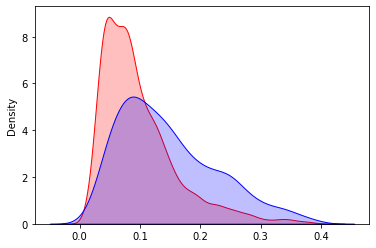

In [ ]:
plot_non_treated = sns.kdeplot(non_treated, shade = True, 
                               color= 'r')
plot_treated = sns.kdeplot(treated, shade = True, 
                           color = 'b')

In [ ]:
model = CausalModel(y, treat, confounders)
model.est_via_matching(bias_adj= True)
print(model.estimates)


Treatment Effect Estimates: Matching

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE      0.142      0.131      1.083      0.279     -0.115      0.400
           ATC      0.133      0.138      0.964      0.335     -0.138      0.405
           ATT      0.220      0.137      1.602      0.109     -0.049      0.488



/usr/local/lib/python3.8/dist-packages/causalinference/estimators/matching.py:100: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  return np.linalg.lstsq(X, Y)[0][1:]  # don't need intercept coef


In [ ]:
df.shape

(5594, 12)

In [ ]:
#prepare for the loop
ate = {}
i = 0
# Start the the loop
while i < 1000:
  # sample
  sample = df.sample(1000)
  # matching preparation
  treat = sample.Remote_work.values
  y = sample.CareerSatisfaction.values
  confounders = sample.drop(columns = ['Remote_work', 'CareerSatisfaction']).values
  # Matching
  model = CausalModel(y, treat, confounders)
  model.est_via_matching(bias_adj= True)
  # Store the results
  ate[i] = model.estimates['matching']['ate']
  i = i + 1

AxesSubplot(0.125,0.125;0.775x0.755)
0.14808370456644526


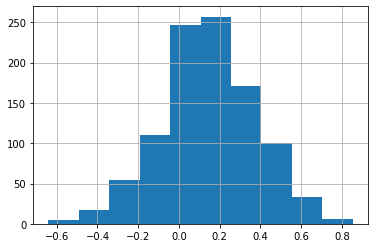

In [ ]:
ate = pd.Series(ate)
print(ate.hist())
print(ate.mean())

In [ ]:
import pandas as pd

# create a sample DataFrame
data = {'A': [1, 2, 3], 'B': [4, 5, 6], 'C': [7, 8, 9]}
data_frame = pd.DataFrame(data)

data_frame.head()
# select rows 0 and 2 and columns 'A' and 'C'
#result = data_frame.iloc[[0, 2], [0, 2]]

#print(result)


,A,B,C
0,1,4,7
1,2,5,8
2,3,6,9
